### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Аминов Зулфикор Мирзокаримович
##### Группа:   НФИбд 02-19

## Москва 2022
***

### Вариант № 5

1. Загрузите из набора данных "diamonds" следующие признаки:
**features/table, features/z, price**

2. Определите признак с минимальным диапазоном изменения значений и постройте гистограмму значений признака.

3. Для признака, имеющего максимальную медиану, постройте и визуализируйте эмпирическую функцию распределения.

4. Вычислите матрицу корреляции признаков и для пары признаков с наиболее низкой корреляцией постройте диаграмму рассеяния.

Решение...

## 1. Загрузите из набора данных "diamonds" следующие признаки:

#### *features/table, features/z, price*

In [47]:
import tensorflow_datasets as tfds

In [6]:
# Загрузка набор данных "diamonds"
ds = tfds.load("diamonds", split='train') 
ds

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ASUS\tensorflow_datasets\diamonds\1.0.0.incomplete6IP8LY\diamonds-train.tfrecord*...:   0%|…

Dataset diamonds downloaded and prepared to C:\Users\ASUS\tensorflow_datasets\diamonds\1.0.0. Subsequent calls will reuse this data.


<PrefetchDataset shapes: {features: {carat: (), clarity: (), color: (), cut: (), depth: (), table: (), x: (), y: (), z: ()}, price: ()}, types: {features: {carat: tf.float32, clarity: tf.int64, color: tf.int64, cut: tf.int64, depth: tf.float32, table: tf.float32, x: tf.float32, y: tf.float32, z: tf.float32}, price: tf.float32}>

In [7]:
# Преобразуем объект PrefetchDataset в датафрейм:
df = tfds.as_dataframe(ds)
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [9]:
# Удаляем ненужные признаки
df.drop(columns=['features/carat'],inplace=True)
df.drop(columns=['features/clarity'],inplace=True)
df.drop(columns=['features/color'],inplace=True)
df.drop(columns=['features/cut'],inplace=True)
df.drop(columns=['features/depth'],inplace=True)
df.drop(columns=['features/x'],inplace=True)
df.drop(columns=['features/y'],inplace=True)

In [10]:
df.head()

,features/table,features/z,price
0,60.0,4.23,6546.0
1,54.0,3.71,3030.0
2,54.0,3.27,1915.0
3,58.0,4.64,6936.0
4,54.0,2.76,646.0


## 2. Определите признак с минимальным диапазоном изменения значений и постройте гистограмму значений признака.

In [43]:
df.min() # минимумы

features/table     43.0
features/z          0.0
price             326.0
dtype: float64

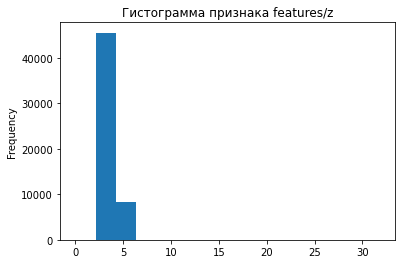

In [75]:
# Гистаграмма признака features/z
df['features/z'].plot.hist(bins=15,title='Гистограмма признака features/z');

## 3. Для признака, имеющего максимальную медиану, постройте и визуализируйте эмпирическую функцию распределения.

In [38]:
df.median() # медианы

features/table      57.00
features/z           3.53
price             2401.00
dtype: float64

In [39]:
df.median().max()   # максимальная медиана

2401.0

In [44]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

In [70]:
samples = df['price'] # sepal length
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

In [71]:
import pandas as pd

df_ECDF = pd.DataFrame(ylist, columns=['price'],index=xlist)
df_ECDF

,price
326.000,0.000037
362.994,0.000853
399.988,0.004579
436.982,0.012551
473.976,0.023230
...,...
18638.030,0.998888
18675.024,0.999036
18712.018,0.999370
18749.012,0.999574


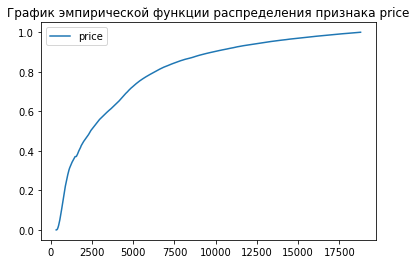

In [72]:
# эмпирическая функция распределения
df_ECDF.plot.line(title='График эмпирической функции распределения признака price');

## 4. Вычислите матрицу корреляции признаков и для пары признаков с наиболее низкой корреляцией постройте диаграмму рассеяния.

In [52]:
df.corr() # матрица корреляции

,features/table,features/z,price
features/table,1.000000,0.150929,0.127134
features/z,0.150929,1.000000,0.861249
price,0.127134,0.861249,1.000000


In [64]:
df.corr().min() # пары признаков с наиболее низкой корреляцией

features/table    0.127134
features/z        0.150929
price             0.127134
dtype: float64

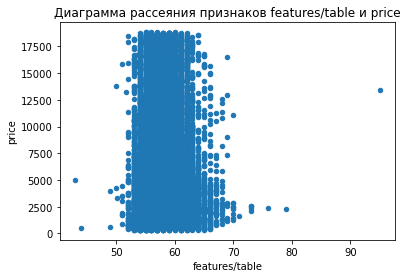

In [65]:
# диаграмма рассеяния
df.plot.scatter('features/table','price',title='Диаграмма рассеяния признаков features/table и price');